In [485]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
pd.set_option('max_columns', None)

In [4]:
#import dataset originally from http://s3.kiva.org/snapshots/kiva_ds_csv.zip
loans = pd.read_csv('C:/Users/mwalz2/Documents/Python/Springboard/Kiva_Capstone_Project/data/raw/loans.csv')

In [5]:
loans.columns

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL'],
      dtype='object')

In [6]:
loans.head()

LOAN_ID                    LOAN_NAME ORIGINAL_LANGUAGE  \
0   372964                      JENELYN           English   
1  1037234                      Zohra\t           English   
2  1037493              Suma Inti Group           Spanish   
3  1800053                        Irene           English   
4   542923  Duo Perlas De Ramirez Group           Spanish   

                                         DESCRIPTION  \
0  At the age of 20, Jenelyn is married and has o...   
1  Zohra is a housewife with four children residi...   
2  La A.C. “Suma Inti” iniciará el segundo ciclo ...   
3  Irene is a married woman with five children. S...   
4  \n\n\nDUO PERLAS DE RAMIREZ\n\nESTA FORMADO PO...   

                              DESCRIPTION_TRANSLATED  FUNDED_AMOUNT  \
0                                                NaN          175.0   
1  Zohra is a housewife with four children residi...          400.0   
2  The “Suma Inti” communal bank is starting thei...         3400.0   
3  Irene is a married woman with five children. S...          150.0   
4  Perlas de Ramirez group.\r\n\r\nThis group has...          775.0   

   LOAN_AMOUNT  STATUS   IMAGE_ID  VIDEO_ID  ... LENDER_TERM  \
0        175.0  funded   952522.0       NaN  ...         8.0   
1        400.0  funded  2124057.0       NaN  ...        13.0   
2       3400.0  funded  2124476.0       NaN  ...        10.0   
3        150.0  funded  3204329.0       NaN  ...         8.0   
4        775.0  funded  1321915.0       NaN  ...         8.0   

  NUM_LENDERS_TOTAL NUM_JOURNAL_ENTRIES NUM_BULK_ENTRIES  \
0                 7                   1                1   
1                15                   2                1   
2                82                   3                2   
3                 6                   2                1   
4                29                   1                1   

                                                TAGS  \
0                                                NaN   
1                             #Parent, user_favorite   
2  #Repeat Borrower, user_favorite, user_favorite...   
3                    #Woman Owned Biz, user_favorite   
4                                                NaN   

                                      BORROWER_NAMES  \
0                                            JENELYN   
1                                            Zohra\t   
2  Eliza Betty, Olga, Dora, Aurora, Gladys, Nelly...   
3                                              Irene   
4                                      Sandra, Marta   

                                    BORROWER_GENDERS  \
0                                             female   
1                                             female   
2  female, female, female, female, female, female...   
3                                             female   
4                                     female, female   

                                   BORROWER_PICTURED REPAYMENT_INTERVAL  \
0                                               true            monthly   
1                                               true            monthly   
2  true, true, true, true, true, true, true, true...            monthly   
3                                               true            monthly   
4                                         true, true            monthly   

   DISTRIBUTION_MODEL  
0       field_partner  
1       field_partner  
2       field_partner  
3       field_partner  
4       field_partner  

[5 rows x 34 columns]

In [7]:
#status of loan is the key outcome 
#The statuses that are relevant for this project are funded or expired (loan did not get 100% funded during funding window)
loans.STATUS.value_counts()/len(loans)

funded         0.947390
expired        0.046875
refunded       0.004599
fundRaising    0.001136
Name: STATUS, dtype: float64

In [8]:
loans.describe().round(2)

LOAN_ID  FUNDED_AMOUNT  LOAN_AMOUNT    IMAGE_ID  VIDEO_ID  \
count  1926374.00     1926374.00   1926374.00  1880820.00   1019.00   
mean    980993.46         777.81       819.24  1954238.73   2870.06   
std     564956.79        1098.04      1209.00   941850.17   1106.04   
min         84.00           0.00        25.00      241.00      7.00   
25%     493351.25         275.00       275.00  1234500.75   2451.50   
50%     980791.50         500.00       500.00  2043564.50   2965.00   
75%    1469071.75         925.00       975.00  2769549.25   3544.00   
max    1963429.00      100000.00    499975.00  3535083.00   4772.00   

       CURRENCY_EXCHANGE_COVERAGE_RATE  PARTNER_ID  LENDER_TERM  \
count                       1534009.00  1906829.00   1926350.00   
mean                              0.11      164.40        13.14   
std                               0.04      102.75         7.30   
min                               0.00        1.00         1.00   
25%                               0.10      107.00         8.00   
50%                               0.10      145.00        13.00   
75%                               0.10      185.00        14.00   
max                               0.20      609.00       195.00   

       NUM_LENDERS_TOTAL  NUM_JOURNAL_ENTRIES  NUM_BULK_ENTRIES  
count         1926374.00           1926374.00        1926374.00  
mean               21.35                 1.53              1.14  
std                28.83                 1.04              0.50  
min                 0.00                 1.00              1.00  
25%                 8.00                 1.00              1.00  
50%                14.00                 1.00              1.00  
75%                26.00                 2.00              1.00  
max              3234.00               124.00             62.00

In [ ]:
loans.describe(include=['O'])

In [9]:
#change all of the date columns to datetime to allow for calculations
loans['POSTED_TIME'] = pd.to_datetime(loans['POSTED_TIME'] )
loans['DISBURSE_TIME'] = pd.to_datetime(loans['DISBURSE_TIME'] )
loans['PLANNED_EXPIRATION_TIME']= pd.to_datetime(loans['PLANNED_EXPIRATION_TIME'])
loans['RAISED_TIME']= pd.to_datetime(loans['RAISED_TIME'])

In [12]:
# of loans posted in each year
loans.POSTED_TIME.dt.year.value_counts().sort_index(ascending = False)

2020     57324
2019    219005
2018    229633
2017    225476
2016    197236
2015    181835
2014    174232
2013    140035
2012    133847
2011    113009
2010     92902
2009     81629
2008     50697
2007     26314
2006      3200
Name: POSTED_TIME, dtype: int64

In [35]:
#create new table for loan data for 2nd half of 2019 to be used to build model 
loans_2019 = loans[loans.POSTED_TIME.between('07-01-2019','12-31-2019')].sort_values('POSTED_TIME', ascending = False).reset_index(drop = True).copy()

#export new table to interim dataset 
loans_2019.to_csv('C:/Users/mwalz2/Documents/Python/Springboard/Kiva_Capstone_Project/data/interim/loans_2019.csv', index= False)

In [69]:
#create new table for loan data that includes 110000 loans between 2011-2019
loans_rand = loans[loans.POSTED_TIME.dt.year.between(2011,2019)].sample(n = 110000, random_state = 27) 

#export to new table to interim dataset 
loans_rand.to_csv('C:/Users/mwalz2/Documents/Python/Springboard/Kiva_Capstone_Project/data/interim/loans_rand.csv', index= False)

In [487]:
loans_2019 = pd.read_csv('C:/Users/mwalz2/Documents/Python/Springboard/Kiva_Capstone_Project/data/interim/loans_2019.csv')

In [488]:
loans_2019

LOAN_ID                      LOAN_NAME ORIGINAL_LANGUAGE  \
0       1904314                        Nainasa           English   
1       1904313  Grupo Las Palmas Monzon Group           Spanish   
2       1904312                         Nanise           English   
3       1904311                          Doris           Spanish   
4       1904310                     Makitalena           English   
...         ...                            ...               ...   
109478  1790539                        Janelyn           English   
109479  1790538                  Chhainorn               English   
109480  1790537                       Margaret           English   
109481  1790536                           Elis           English   
109482  1790535                 Sarouen                  English   

                                              DESCRIPTION  \
0       57 Year old Nainasa  a market seller says that...   
1       Francisca es madre de familia con 26 años de e...   
2       Nanise has seen the increase in her clientele ...   
3       Doris es una joven emprendedora que se dedica ...   
4       Makitalena at just 38 is now finally trying to...   
...                                                   ...   
109478  Janelyn works hard to support one child.<br />...   
109479  Chhainorn is 49 years old, married and living ...   
109480  Margaret is a 27-year-old married woman with t...   
109481  Elis is a woman in her forties. She is very bu...   
109482  Sarouen is 61 years old and is a married man w...   

                                   DESCRIPTION_TRANSLATED  FUNDED_AMOUNT  \
0       57 Year old Nainasa  a market seller says that...          700.0   
1       Francisca is the mother to a family.  She is 2...          150.0   
2       Nanise has seen the increase in her clientele ...         3250.0   
3       Doris is a young entrepreneur who has been mak...          900.0   
4       Makitalena at just 38 is now finally trying to...          700.0   
...                                                   ...            ...   
109478  Janelyn works hard to support one child.<br />...          125.0   
109479  Chhainorn is 49 years old, married and living ...         1000.0   
109480  Margaret is a 27-year-old married woman with t...          750.0   
109481  Elis is a woman in her forties. She is very bu...          900.0   
109482  Sarouen is 61 years old and is a married man w...          450.0   

        LOAN_AMOUNT   STATUS   IMAGE_ID  VIDEO_ID              ACTIVITY_NAME  \
0             700.0   funded  3335953.0       NaN        Fruits & Vegetables   
1            2100.0  expired  3348199.0       NaN             Clothing Sales   
2            3250.0   funded  3336034.0       NaN                   Catering   
3             900.0   funded  3348197.0       NaN                     Bakery   
4             700.0   funded  3336041.0       NaN                     Bakery   
...             ...      ...        ...       ...                        ...   
109478        125.0   funded  3191398.0       NaN  Personal Housing Expenses   
109479       1000.0   funded  3191394.0       NaN                    Farming   
109480        750.0   funded  3191392.0       NaN                    Farming   
109481        900.0   funded  3191391.0       NaN              General Store   
109482        750.0  expired  3191389.0       NaN       Motorcycle Transport   

           SECTOR_NAME                                           LOAN_USE  \
0                 Food                  To start planting kava and ginger   
1             Clothing  to buy traditional clothing to sell, such as g...   
2                 Food  To buy more catering materials and a bigger st...   
3                 Food  to buy construction materials to enlarge her h...   
4                 Food  To pay for basic baking items such as trays, h...   
...                ...                                                ...   
109478         Housing         to build a san

In [489]:
#change all of the date columns to datetime to allow for calculations
loans_2019['POSTED_TIME'] = pd.to_datetime(loans_2019['POSTED_TIME'] )
loans_2019['DISBURSE_TIME'] = pd.to_datetime(loans_2019['DISBURSE_TIME'] )
loans_2019['PLANNED_EXPIRATION_TIME']= pd.to_datetime(loans_2019['PLANNED_EXPIRATION_TIME'])
loans_2019['RAISED_TIME']= pd.to_datetime(loans_2019['RAISED_TIME'])

In [14]:
#create pandas profiling report for loans2019
profile = ProfileReport(loans_2019, title='Loans Pandas Profiling Report', explorative = True)

profile

Summarize dataset:   0%|          | 0/47 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
loans_2019[loans_2019.DISTRIBUTION_MODEL == 'direct'].groupby([loans_2019.STATUS,loans_2019.DISTRIBUTION_MODEL,loans_2019.POSTED_TIME.dt.year]).agg({'LOAN_ID': 'count', 'LOAN_AMOUNT': ['sum','mean']})

LOAN_ID LOAN_AMOUNT             
                                          count         sum         mean
STATUS   DISTRIBUTION_MODEL POSTED_TIME                                 
expired  direct             2019             81    461500.0  5697.530864
funded   direct             2019            327   2056000.0  6287.461774
refunded direct             2019              3     19000.0  6333.333333

In [380]:
pd.set_option('display.max_rows', 500)
loans_2019.groupby(['SECTOR_NAME', 'ACTIVITY_NAME'], as_index = False).LOAN_ID.agg('count').sort_values(by = ['SECTOR_NAME','LOAN_ID'], ascending = [True, False])

SECTOR_NAME                   ACTIVITY_NAME  LOAN_ID
7       Agriculture                         Farming    13660
0       Agriculture                     Agriculture     3643
11      Agriculture                            Pigs     3479
4       Agriculture                          Cattle     2227
5       Agriculture                           Dairy     1837
12      Agriculture                         Poultry     1428
10      Agriculture                       Livestock     1421
1       Agriculture                    Animal Sales      782
6       Agriculture                   Farm Supplies      264
2       Agriculture                     Aquaculture      125
3       Agriculture                      Beekeeping       81
8       Agriculture                         Flowers       55
13      Agriculture                Veterinary Sales       27
9       Agriculture                     Land Rental        7
22             Arts                         Weaving      672
15             Arts                          Crafts      605
16             Arts                      Embroidery      265
21             Arts                        Textiles      226
14             Arts                            Arts      183
18             Arts                        Knitting       44
20             Arts                       Patchwork        3
19             Arts             Musical Instruments        2
17             Arts                            Film        1
24         Clothing                  Clothing Sales     3439
25         Clothing                   Used Clothing      832
23         Clothing                        Clothing      461
26         Clothing                      Used Shoes      115
30     Construction                    Construction      347
31     Construction           Construction Supplies      216
27     Construction                          Bricks      115
28     Construction                       Carpentry       73
33     Construction                    Timber Sales       53
29     Construction                          Cement       26
32     Construction                       Quarrying       21
34     Construction                    Well digging        6
37        Education          Higher education costs     2388
38        Education  Primary/secondary school costs     2042
36        Education              Education provider      661
35        Education                        Computer      495
39    Entertainment                   Entertainment       35
40    Entertainment                           Games       28
41    Entertainment             Musical Performance       16
54             Food           Food Production/Sales     4594
57             Food                   Grocery Store     2347
56             Food             Fruits & Vegetables     2161
50             Food                    Fish Selling     1724
52             Food                            Food     1527
48             Food                         Cereals     1257
53             Food                     Food Market     1231
51             Food                         Fishing     1187
55             Food                      Food Stall      986
44             Food                       Beverages      746
61             Food                      Restaurant      730
42             Food                          Bakery      583
45             Food                    Butcher Shop      253
47             Food                        Catering      193
46             Food                            Cafe      132
60             Food                             Pub      111
58             Food      Liquor Store / Off-License       97
59             Food                      Milk Sales       77
49             Food                   Cheese Making       41
43             Food                    Balut-Making        3
66           Health       Personal Medical Expenses     1274
67           Health                        Pharmacy      156
65           Health               Natural M

In [ ]:
#remove all rows with status = refunded
#what is currency policy(shared vs. standard) and what is currency exchange coverage rate
#determine who is partner iD 145 (20%+ of loans) Philippines Negro Women for Tomorrow Foundation
#what is lender term (int number) - Number of months to repay the loan
#look at extreme values for # of lenders
#drop number of journal entries; almost all values =1 
#determine what bulk entries means consider dropping
#Ask Reza about extracting common words from tags column; how to then utilize
#create column for # of borrowers 
#create column to summarize if there is a woman in the group of borrowers 
#98% of borrowers are pictured should this be dropper?
#could drop borrower name doesn't seem to have relevance... unless we wanted to look at foreign names vs. english names 
#what does bullet repayment - single lump sum 
#should we look at direct and field partner distribution models separately 

In [490]:
#drop video_id column 99% missing & drop number of journal entries column; almost all values =1 

loans_2019.drop(['VIDEO_ID','NUM_JOURNAL_ENTRIES'], axis = 1, inplace = True)

In [491]:
#remove all rows with status = refunded; 623 loans majority of fields are Nan.  This is also not an outcome we are seeking to predict

loans_2019.drop(loans_2019[loans_2019.STATUS =='refunded'].index, inplace = True)

In [492]:
#add another column that calculates the average amount each lender put towards the loan 
loans_2019['AVG_LENDER_AMT'] = round(loans_2019.FUNDED_AMOUNT/loans_2019.NUM_LENDERS_TOTAL,0)

In [504]:
loans_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108860 entries, 0 to 109482
Data columns (total 37 columns):
 #   Column                           Non-Null Count   Dtype              
---  ------                           --------------   -----              
 0   LOAN_ID                          108860 non-null  int64              
 1   LOAN_NAME                        108859 non-null  object             
 2   ORIGINAL_LANGUAGE                108860 non-null  object             
 3   DESCRIPTION                      108860 non-null  object             
 4   DESCRIPTION_TRANSLATED           108860 non-null  object             
 5   FUNDED_AMOUNT                    108860 non-null  float64            
 6   LOAN_AMOUNT                      108860 non-null  float64            
 7   FUNDED_PERCENT                   108860 non-null  float64            
 8   STATUS                           108860 non-null  object             
 9   IMAGE_ID                         108860 non-null  float64  

In [494]:
#create list that contains number of borrowers by counting the number of names associated with each loan
borrower_list = loans_2019['BORROWER_NAMES'].str.split(',')
NUM_BORROWERS_TOTAL =[]
for i, value in borrower_list.items(): 
    if isinstance(value, list):
        NUM_BORROWERS_TOTAL.append(len(value))
    else: 
        NUM_BORROWERS_TOTAL.append(1)

In [495]:
#insert number of borrowers into the loans_2019 dataframe
loans_2019.insert(27,'NUM_BORROWERS_TOTAL',list(NUM_BORROWERS_TOTAL))

In [497]:
#insert column to identify if any male borrowers are part of the loan into loans_2019 dataframe
loans_2019.insert(30,'FEMALE_ONLY_LOAN', 1)

In [499]:
#identify any loans that include males 
indices = loans_2019[(loans_2019.BORROWER_GENDERS.notna()) & (loans_2019.BORROWER_GENDERS.str.contains(".*female.*\\bmale.*"))| (loans_2019.BORROWER_GENDERS =='male')].index

In [500]:
#update column to identify loans including males 
loans_2019.loc[indices,'FEMALE_ONLY_LOAN'] =0

In [501]:
#Add column that calculates the number of hours that it took to get a loan funded 
loans_2019.insert(23,'RAISED_HOURS',round(pd.to_timedelta(loans_2019.RAISED_TIME - loans_2019.POSTED_TIME)/ pd.Timedelta('1 hour'),2))

In [503]:
#add column that calculates what % the loan was funded (i.e. if expired how close was it to reaching funding)

loans_2019.insert(7,'FUNDED_PERCENT', round(loans_2019.FUNDED_AMOUNT/loans_2019.LOAN_AMOUNT,2))



In [505]:
#Identify the most common tags 
loan_tags = loans_2019['TAGS'].str.split('#|,')
TAGS_DICT ={}
for i, tags in loan_tags.items():
    if isinstance(tags, list):
        for tag in tags: 
            if tag.strip() in TAGS_DICT:
                TAGS_DICT[tag.strip()] += 1
            else:
                TAGS_DICT[tag.strip()] = 1
del TAGS_DICT['']
sorted(TAGS_DICT.items(), key=lambda x: x[1], reverse =True)

[('user_favorite', 86349),
 ('Woman Owned Biz', 28313),
 ('Parent', 27845),
 ('Repeat Borrower', 19421),
 ('Eco-friendly', 16481),
 ('Health and Sanitation', 14873),
 ('Elderly', 14348),
 ('Schooling', 10497),
 ('Animals', 9720),
 ('Vegan', 7691),
 ('Biz Durable Asset', 7579),
 ('Repair Renew Replace', 4990),
 ('Technology', 4539),
 ('Single Parent', 3325),
 ('volunteer_pick', 2992),
 ('Fabrics', 2975),
 ('Supporting Family', 2749),
 ('Single', 2747),
 ('First Loan', 2423),
 ('Sustainable Ag', 1949),
 ('volunteer_like', 1817),
 ('Widowed', 1690),
 ('Trees', 1248),
 ('Job Creator', 1229),
 ('Refugee', 786),
 ('Unique', 784),
 ('Female Education', 681),
 ('Orphan', 56),
 ('US immigrant', 51)]

In [506]:
#replace all Nan values with empty list to allow for looping
indices = loan_tags[loan_tags.isna()].index
loan_tags[indices]=loan_tags[indices].apply(lambda d: d if isinstance(d, list) else [])

#remove all whitespaces from tags
for i, tags in loan_tags.items():
    loan_tags[i] = [tag.strip() for tag in tags]

In [507]:
#create dataframe with columns corresponding to tags 
tag_df = pd.DataFrame()
column_names = []
tag_present = []

for key in TAGS_DICT.keys():
    column_names.append(key)
    for i, tags in loan_tags.items():
        if (key in tags):
            tag_present.append(1)
        else: 
            tag_present.append(0)
    tag_df[key] = tag_present
    tag_present = []

In [508]:
#merge dataframe with tag columns to original dataframe 

loans_2019_tags = pd.concat([loans_2019, tag_df], axis=1, join = "inner") 

In [509]:
#Create dummy variables for all of the Sector names 

dummies = pd.get_dummies(loans_2019_tags.ACTIVITY_NAME, drop_first=True).rename(columns=lambda x: 'Activity_' + str(x))

loans_2019_tags = pd.concat([loans_2019_tags, dummies], axis=1)

loans_2019_tags.head()


LOAN_ID                      LOAN_NAME ORIGINAL_LANGUAGE  \
0  1904314                        Nainasa           English   
1  1904313  Grupo Las Palmas Monzon Group           Spanish   
2  1904312                         Nanise           English   
3  1904311                          Doris           Spanish   
4  1904310                     Makitalena           English   

                                         DESCRIPTION  \
0  57 Year old Nainasa  a market seller says that...   
1  Francisca es madre de familia con 26 años de e...   
2  Nanise has seen the increase in her clientele ...   
3  Doris es una joven emprendedora que se dedica ...   
4  Makitalena at just 38 is now finally trying to...   

                              DESCRIPTION_TRANSLATED  FUNDED_AMOUNT  \
0  57 Year old Nainasa  a market seller says that...          700.0   
1  Francisca is the mother to a family.  She is 2...          150.0   
2  Nanise has seen the increase in her clientele ...         3250.0   
3  Doris is a young entrepreneur who has been mak...          900.0   
4  Makitalena at just 38 is now finally trying to...          700.0   

   LOAN_AMOUNT  FUNDED_PERCENT   STATUS   IMAGE_ID        ACTIVITY_NAME  \
0        700.0            1.00   funded  3335953.0  Fruits & Vegetables   
1       2100.0            0.07  expired  3348199.0       Clothing Sales   
2       3250.0            1.00   funded  3336034.0             Catering   
3        900.0            1.00   funded  3348197.0               Bakery   
4        700.0            1.00   funded  3336041.0               Bakery   

  SECTOR_NAME                                           LOAN_USE COUNTRY_CODE  \
0        Food                  To start planting kava and ginger           FJ   
1    Clothing  to buy traditional clothing to sell, such as g...           GT   
2        Food  To buy more catering materials and a bigger st...           FJ   
3        Food  to buy construction materials to enlarge her h...           CR   
4        Food  To pay for basic baking items such as trays, h...           FJ   

  COUNTRY_NAME      TOWN_NAME CURRENCY_POLICY  \
0         Fiji       Nawamagi        standard   
1    Guatemala  Suchitepéquez          shared   
2         Fiji         Labasa        standard   
3   Costa Rica       San José          shared   
4         Fiji         Nagigi        standard   

   CURRENCY_EXCHANGE_COVERAGE_RATE CURRENCY  PARTNER_ID  \
0                              NaN      FJD       562.0   
1                              0.1      GTQ       246.0   
2                              NaN      FJD       562.0   
3                              0.0      CRC       127.0   
4                              NaN      FJD       562.0   

                POSTED_TIME   PLANNED_EXPIRATION_TIME  \
0 2019-12-30 23:26:32+00:00 2020-02-15 08:00:35+00:00   
1 2019-12-30 23:16:30+00:00 2020-02-14 12:40:14+00:00   
2 2019-12-30 23:14:11+00:00 2020-02-16 19:00:11+00:00   
3 2019-12-30 23:03:48+00:00 2020-02-14 12:40:04+00:00   
4 2019-12-30 23:01:40+00:00 2020-02-15 08:00:35+00:00   

              DISBURSE_TIME               RAISED_TIME  RAISED_HOURS  \
0 2019-12-06 08:00:00+00:00 2020-01-01 18:54:49+00:00         43.47   
1 2019-12-07 08:00:00+00:00                       NaT           NaN   
2 2019-11-29 08:00:00+00:00 2020-02-01 13:56:30+00:00        782.71   
3 2019-12-13 08:00:00+00:00 2020-01-01 13:54:08+00:00         38.84   
4 2019-12-05 08:00:00+00:00 2020-01-01 22:30:36+00:00         47.48   

   LENDER_TERM  NUM_LENDERS_TOTAL  NUM_BULK_ENTRIES  \
0         14.0                 25                 1   
1         14.0                  6                 1   
2         14.0                114                 1   
3         26.0                 32                 1   
4         14.0                 27                 1   

                                                TAGS  NUM_BORROWERS_TOTAL  \
0  #Woman Owned Biz, #Elderly, user_favorite, #Vegan                    1   
1                

In [510]:
#Create dummy variable for the STATUS column
dummies = pd.get_dummies(loans_2019_tags.STATUS, drop_first=True).rename(columns=lambda x: 'Status_' + str(x))

loans_2019_tags = pd.concat([loans_2019_tags, dummies], axis=1)

loans_2019_tags.head()

LOAN_ID                      LOAN_NAME ORIGINAL_LANGUAGE  \
0  1904314                        Nainasa           English   
1  1904313  Grupo Las Palmas Monzon Group           Spanish   
2  1904312                         Nanise           English   
3  1904311                          Doris           Spanish   
4  1904310                     Makitalena           English   

                                         DESCRIPTION  \
0  57 Year old Nainasa  a market seller says that...   
1  Francisca es madre de familia con 26 años de e...   
2  Nanise has seen the increase in her clientele ...   
3  Doris es una joven emprendedora que se dedica ...   
4  Makitalena at just 38 is now finally trying to...   

                              DESCRIPTION_TRANSLATED  FUNDED_AMOUNT  \
0  57 Year old Nainasa  a market seller says that...          700.0   
1  Francisca is the mother to a family.  She is 2...          150.0   
2  Nanise has seen the increase in her clientele ...         3250.0   
3  Doris is a young entrepreneur who has been mak...          900.0   
4  Makitalena at just 38 is now finally trying to...          700.0   

   LOAN_AMOUNT  FUNDED_PERCENT   STATUS   IMAGE_ID        ACTIVITY_NAME  \
0        700.0            1.00   funded  3335953.0  Fruits & Vegetables   
1       2100.0            0.07  expired  3348199.0       Clothing Sales   
2       3250.0            1.00   funded  3336034.0             Catering   
3        900.0            1.00   funded  3348197.0               Bakery   
4        700.0            1.00   funded  3336041.0               Bakery   

  SECTOR_NAME                                           LOAN_USE COUNTRY_CODE  \
0        Food                  To start planting kava and ginger           FJ   
1    Clothing  to buy traditional clothing to sell, such as g...           GT   
2        Food  To buy more catering materials and a bigger st...           FJ   
3        Food  to buy construction materials to enlarge her h...           CR   
4        Food  To pay for basic baking items such as trays, h...           FJ   

  COUNTRY_NAME      TOWN_NAME CURRENCY_POLICY  \
0         Fiji       Nawamagi        standard   
1    Guatemala  Suchitepéquez          shared   
2         Fiji         Labasa        standard   
3   Costa Rica       San José          shared   
4         Fiji         Nagigi        standard   

   CURRENCY_EXCHANGE_COVERAGE_RATE CURRENCY  PARTNER_ID  \
0                              NaN      FJD       562.0   
1                              0.1      GTQ       246.0   
2                              NaN      FJD       562.0   
3                              0.0      CRC       127.0   
4                              NaN      FJD       562.0   

                POSTED_TIME   PLANNED_EXPIRATION_TIME  \
0 2019-12-30 23:26:32+00:00 2020-02-15 08:00:35+00:00   
1 2019-12-30 23:16:30+00:00 2020-02-14 12:40:14+00:00   
2 2019-12-30 23:14:11+00:00 2020-02-16 19:00:11+00:00   
3 2019-12-30 23:03:48+00:00 2020-02-14 12:40:04+00:00   
4 2019-12-30 23:01:40+00:00 2020-02-15 08:00:35+00:00   

              DISBURSE_TIME               RAISED_TIME  RAISED_HOURS  \
0 2019-12-06 08:00:00+00:00 2020-01-01 18:54:49+00:00         43.47   
1 2019-12-07 08:00:00+00:00                       NaT           NaN   
2 2019-11-29 08:00:00+00:00 2020-02-01 13:56:30+00:00        782.71   
3 2019-12-13 08:00:00+00:00 2020-01-01 13:54:08+00:00         38.84   
4 2019-12-05 08:00:00+00:00 2020-01-01 22:30:36+00:00         47.48   

   LENDER_TERM  NUM_LENDERS_TOTAL  NUM_BULK_ENTRIES  \
0         14.0                 25                 1   
1         14.0                  6                 1   
2         14.0                114                 1   
3         26.0                 32                 1   
4         14.0                 27                 1   

                                                TAGS  NUM_BORROWERS_TOTAL  \
0  #Woman Owned Biz, #Elderly, user_favorite, #Vegan                    1   
1                

In [511]:
#Create 2nd pandas profile with the new loans table to identify if additional correlation can be found
profile2 = ProfileReport(loans_2019_tags, title='Loans & Tags Pandas Profiling Report', explorative = True)

profile2

Summarize dataset:   0%|          | 0/243 [00:00<?, ?it/s]

MemoryError: Unable to allocate 760. MiB for an array with shape (108237, 230, 4) and data type float64

In [653]:
#identify which features have the highest correlation with the Status column
correlation = loans_2019_tags.corr()
correlation.Status_funded.sort_values()

LENDER_TERM                               -0.125577
CURRENCY_EXCHANGE_COVERAGE_RATE           -0.118786
LOAN_AMOUNT                               -0.091140
Activity_Taxi                             -0.060847
Activity_Hotel                            -0.054964
Activity_Cattle                           -0.048322
Activity_Food Production/Sales            -0.033598
Activity_Motorcycle Transport             -0.028857
Activity_General Store                    -0.028843
Activity_Beauty Salon                     -0.022943
Activity_Retail                           -0.021886
Activity_Services                         -0.020266
Activity_Clothing Sales                   -0.018103
Activity_Entertainment                    -0.018040
Activity_Food                             -0.017231
Activity_Auto Repair                      -0.015676
Woman Owned Biz                           -0.015637
Activity_Butcher Shop                     -0.015554
Activity_Transportation                   -0.015444
Activity_Clo

In [628]:
#Expired loans tend to be for larger amounts with longer terms 
loans_2019_tags.groupby(['STATUS']).agg({'LOAN_ID':'count','LOAN_AMOUNT': ['median'], 'LENDER_TERM':['median']}).sort_values(['STATUS'])

LOAN_ID LOAN_AMOUNT LENDER_TERM
          count      median      median
STATUS                                 
expired    4075       975.0        14.0
funded   104162       425.0        13.0

In [590]:
#Create summary pivot table of loan information
loan_summary= pd.DataFrame(loans_2019_tags.pivot_table(index = ['SECTOR_NAME', 'ACTIVITY_NAME'], columns = 'STATUS', values = ['LOAN_ID','LOAN_AMOUNT','LENDER_TERM','RAISED_HOURS', 'FUNDED_PERCENT'], aggfunc={'LOAN_ID':'count','LOAN_AMOUNT':'median', 'LENDER_TERM':'median','RAISED_HOURS':'median', 'FUNDED_PERCENT':'median'}, fill_value =0 ).to_records())

In [594]:
#rename the columns
loan_summary.columns = ['SECTOR_NAME', 'ACTIVITY_NAME', 'EXP_FUNDED_PERCENT',
       'FUND_FUNDED_PERCENT', 'EXP_LENDER_TERM',
       'FUND_LENDER_TERM', 'EXP_LOAN_AMOUNT',
       'FUND_LOAN_AMOUNT', 'EXP_TOTAL_LOANS',
       'FUND_TOTAL_LOANS', 'EXP_RAISED_HOURS',
       'FUND_RAISED_HOURS']

In [597]:
#remove columns that don't apply based on loan status 
loan_summary.drop(['EXP_RAISED_HOURS','FUND_FUNDED_PERCENT'], axis = 1, inplace = True) 

In [600]:
#Add two additional columns to summarize all loan information 
loan_summary['TOTAL_LOANS']= loan_summary.EXP_TOTAL_LOANS + loan_summary.FUND_TOTAL_LOANS
loan_summary['FUNDED_PERCENT']= loan_summary.FUND_TOTAL_LOANS/loan_summary.TOTAL_LOANS


In [606]:
#rearrange the columns
loan_summary = loan_summary[['SECTOR_NAME', 'ACTIVITY_NAME', 'TOTAL_LOANS', 'FUNDED_PERCENT', 'FUND_TOTAL_LOANS', 'EXP_TOTAL_LOANS', 
       'FUND_LOAN_AMOUNT','EXP_LOAN_AMOUNT', 'FUND_LENDER_TERM', 'EXP_LENDER_TERM',
         'FUND_RAISED_HOURS' , 'EXP_FUNDED_PERCENT']]

In [625]:
#View the loan summary table by total number of loans in each activity
loan_summary.sort_values('TOTAL_LOANS', ascending = False)

SECTOR_NAME                   ACTIVITY_NAME  TOTAL_LOANS  \
68          Housing       Personal Housing Expenses        15556   
7       Agriculture                         Farming        13598   
94           Retail                   General Store         7091   
54             Food           Food Production/Sales         4546   
112          Retail                          Retail         3882   
0       Agriculture                     Agriculture         3637   
11      Agriculture                            Pigs         3461   
24         Clothing                  Clothing Sales         3420   
79     Personal Use                 Home Appliances         2591   
37        Education          Higher education costs         2381   
57             Food                   Grocery Store         2329   
4       Agriculture                          Cattle         2210   
56             Food             Fruits & Vegetables         2147   
38        Education  Primary/secondary school costs         2033   
5       Agriculture                           Dairy         1824   
50             Food                    Fish Selling         1708   
80     Personal Use                     Home Energy         1666   
52             Food                            Food         1520   
81     Personal Use               Personal Expenses         1467   
12      Agriculture                         Poultry         1419   
10      Agriculture                       Livestock         1413   
66           Health       Personal Medical Expenses         1266   
48             Food                         Cereals         1254   
53             Food                     Food Market         1225   
51             Food                         Fishing         1179   
149        Services                       Tailoring         1148   
148        Services                          Sewing         1145   
122        Services                    Beauty Salon         1103   
55             Food                      Food Stall          984   
25         Clothing                   Used Clothing          830   
1       Agriculture                    Animal Sales          775   
44             Food                       Beverages          741   
61             Food                      Restaurant          726   
22             Arts                         Weaving          672   
157  Transportation            Motorcycle Transport          672   
36        Education              Education provider          660   
88           Retail                 Cosmetics Sales          636   
15             Arts                          Crafts          600   
42             Food                          Bakery          578   
147        Services                        Services          575   
96           Retail             Home Products Sales          507   
35        Education                        Computer          494   
86           Retail                  Charcoal Sales          489   
113          Retail                      Shoe Sales          479   
23         Clothing                        Clothing          457   
105          Retail         Personal Products Sales          415   
30     Construction                    Construction          345   
160  Transportation                  Transportation          315   
16             Arts                      Embroidery          265   
6       Agriculture                   Farm Supplies          264   
159  Transportation                            Taxi          259   
45             Food                    Butcher Shop          253   
71    Manufacturing                Furniture Making          249   
73    Manufacturing                   Manufacturing          246   
21             Arts                        Textiles          226   
31     Construction           Construction Supplies          213   
97           Retail                         Jewelry          211   
87           Retail    Cloth & Dressmaking Supplies          196

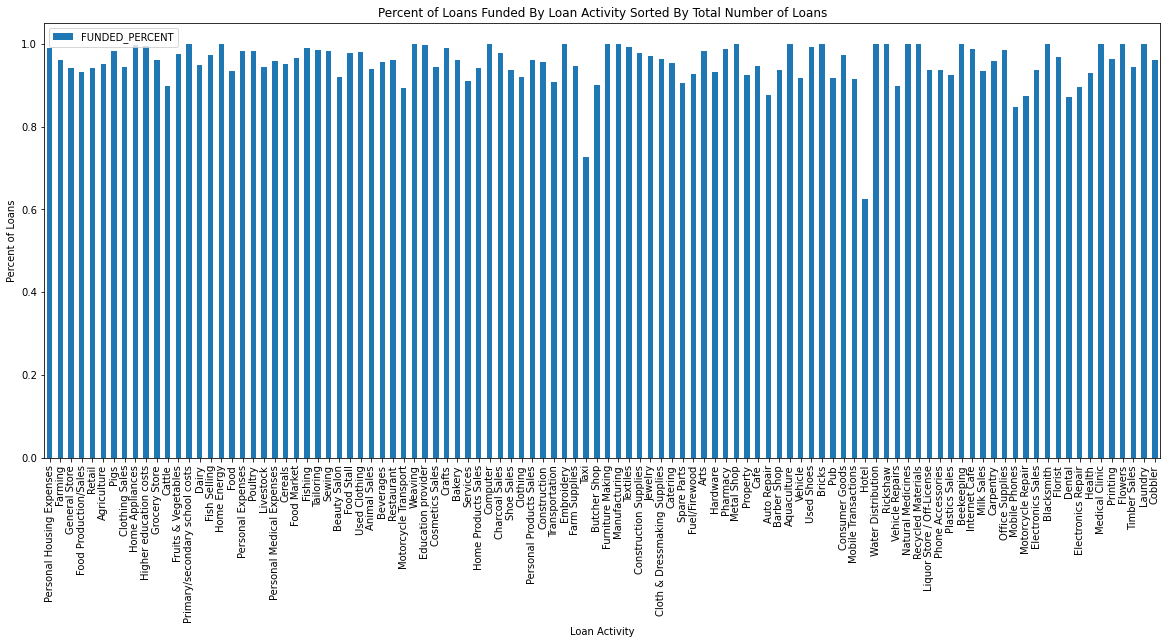

In [648]:
#Graph summarizing % Funded segments of loans sorted by the greatest number of loans 
loan_summary[(loan_summary.TOTAL_LOANS >50)].sort_values('TOTAL_LOANS', ascending = False).plot(kind = 'bar', x = 'ACTIVITY_NAME', y = ['FUNDED_PERCENT'],  figsize= (20,8))
plt.title("Percent of Loans Funded By Loan Activity Sorted By Total Number of Loans")
plt.ylabel("Percent of Loans")
plt.xlabel("Loan Activity")
plt.show()

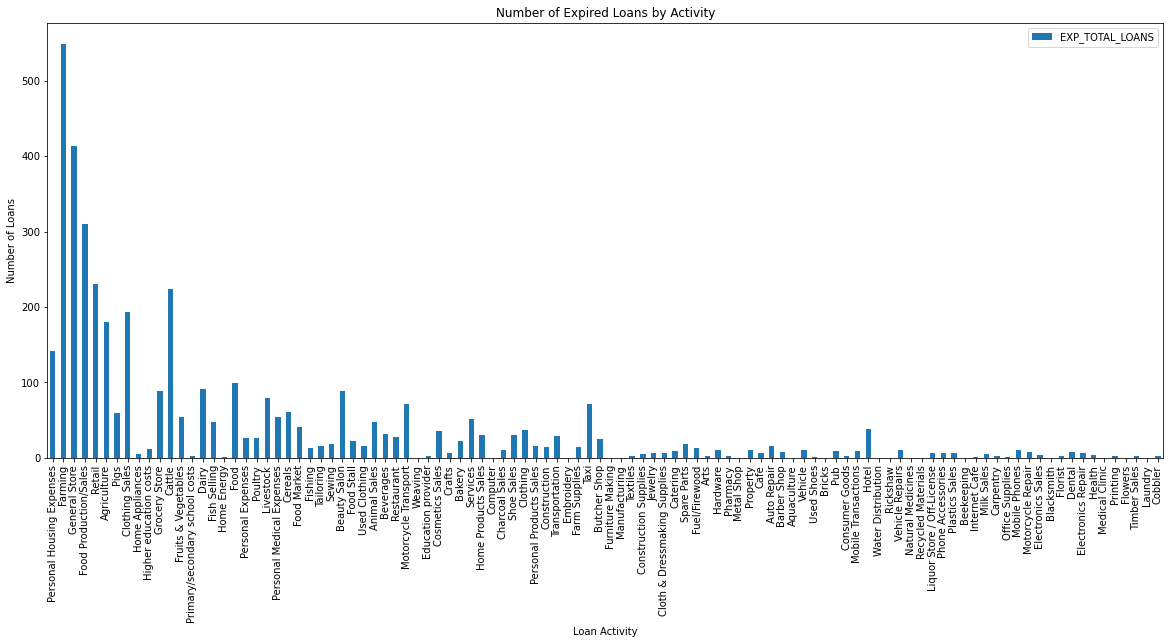

In [650]:
#Graph summarizing unfunded loans
loan_summary[(loan_summary.TOTAL_LOANS >50)].sort_values('TOTAL_LOANS', ascending = False).plot(kind = 'bar', x = 'ACTIVITY_NAME', y = ['EXP_TOTAL_LOANS'], figsize= (20,8))
plt.title("Number of Expired Loans by Activity")
plt.ylabel("Number of Loans")
plt.xlabel("Loan Activity")
plt.show()

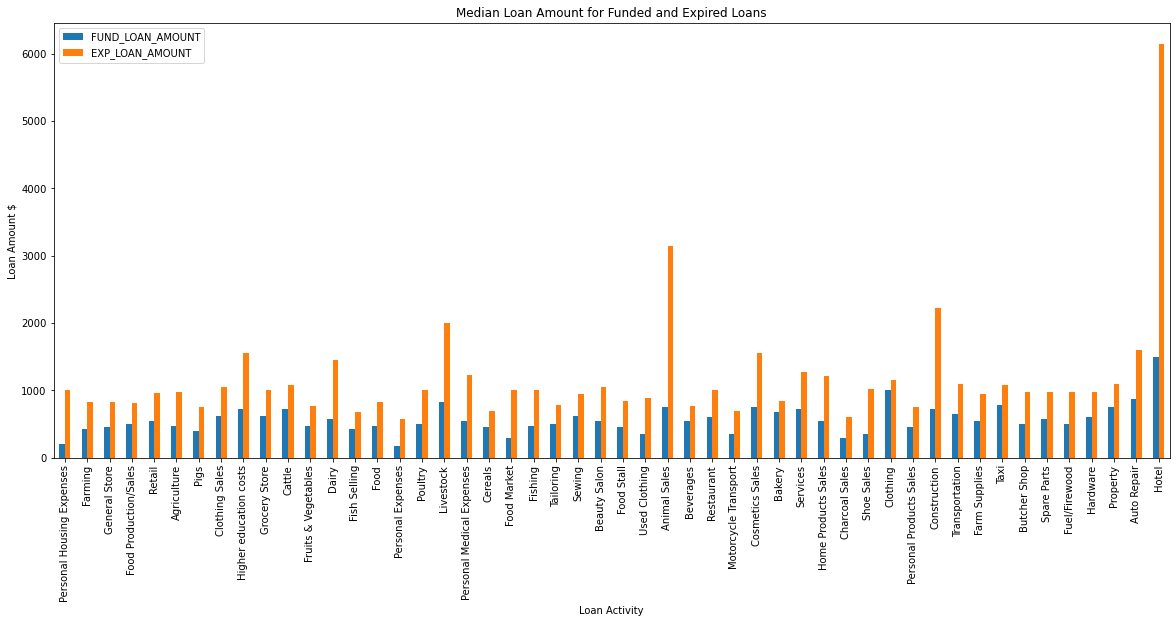

In [641]:
#Graph summarizing Loan Amount for segments of loans; loans that weren't funded tended to be for larger loans 
loan_summary[(loan_summary.EXP_TOTAL_LOANS >10)].sort_values('TOTAL_LOANS', ascending = False).plot(kind = 'bar', x = 'ACTIVITY_NAME', y = ['FUND_LOAN_AMOUNT','EXP_LOAN_AMOUNT'],  figsize= (20,8))
plt.title("Median Loan Amount for Funded and Expired Loans")
plt.ylabel("Loan Amount $")
plt.xlabel("Loan Activity")
plt.show()

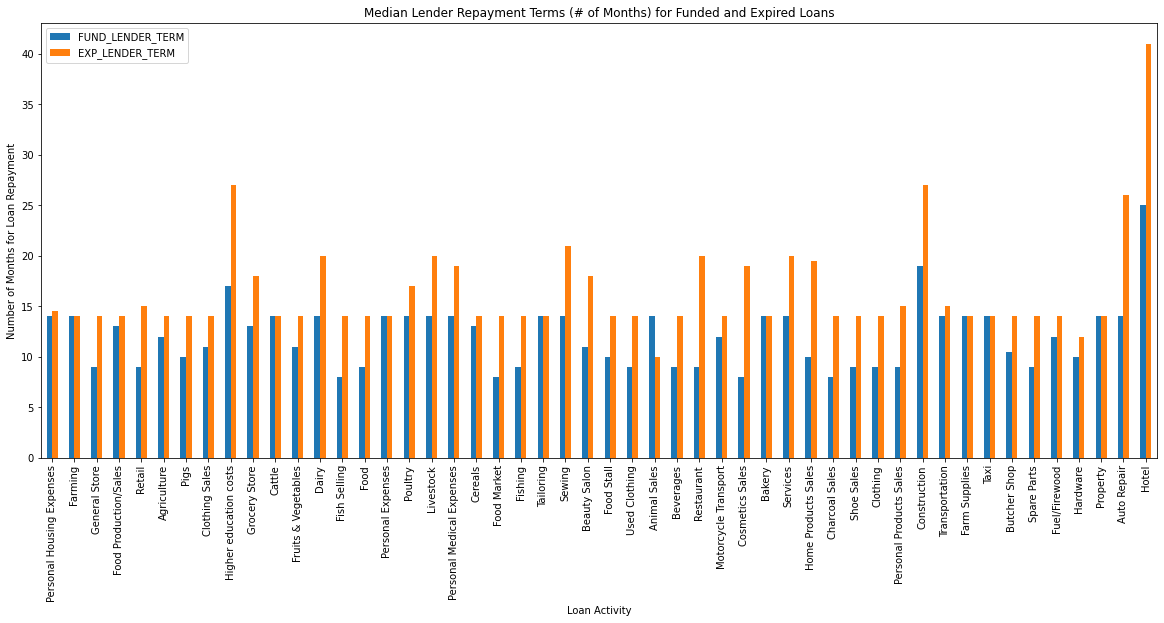

In [652]:
#Graph summarizing Lender terms for segments of loans; loans that weren't funded tended to have longer lender terms
loan_summary[(loan_summary.EXP_TOTAL_LOANS >10)].sort_values('TOTAL_LOANS', ascending = False).plot(kind = 'bar', x = 'ACTIVITY_NAME', y = ['FUND_LENDER_TERM','EXP_LENDER_TERM'], figsize= (20,8))
plt.title("Median Lender Repayment Terms (# of Months) for Funded and Expired Loans")
plt.ylabel("Number of Months for Loan Repayment")
plt.xlabel("Loan Activity")
plt.show()

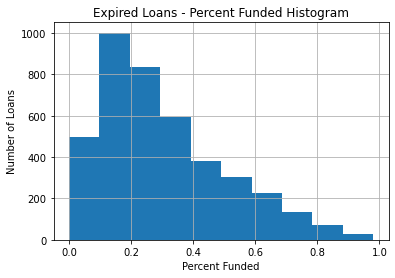

In [637]:
#Histogram showing the Percent Funded (how close to being fulled funded) was the loan when it expired; majority of loans were 20-30% funded
loans_2019_tags[(loans_2019_tags.Status_funded == 0)].FUNDED_PERCENT.hist()
plt.title("Expired Loans - Percent Funded Histogram")
plt.xlabel("Percent Funded")
plt.ylabel("Number of Loans")
plt.show()

In [676]:
#Certain Partners seem to have a better track record for getting loans funded 
loans_2019_tags.pivot_table(index = 'PARTNER_ID', columns = ['STATUS'], values ='LOAN_ID', aggfunc ='count', fill_value = 0).sort_values('funded', ascending = False)

STATUS      expired  funded
PARTNER_ID                 
145.0           163   23186
156.0           151    4743
199.0           275    3650
137.0             0    3248
177.0           181    2985
596.0             1    2953
311.0             0    2296
182.0             0    2220
428.0             0    2196
125.0             8    1962
222.0           181    1942
65.0              3    1911
123.0            88    1814
63.0             28    1789
100.0            36    1760
121.0             3    1721
296.0             6    1715
133.0           261    1669
58.0             15    1571
15.0            496    1549
202.0            63    1473
171.0           179    1410
288.0            47    1387
386.0            99    1296
119.0             0    1288
443.0             0    1258
167.0            23     935
243.0            58     919
80.0             26     905
499.0            34     892
163.0           245     881
188.0            39     864
77.0             50     852
245.0             0     808
176.0            55     717
154.0           200     681
181.0            44     646
105.0            33     633
231.0            11     584
572.0             0     578
411.0            34     565
23.0             32     548
201.0             0     546
359.0             0     534
161.0            64     524
388.0             0     514
185.0            48     489
406.0             0     476
169.0           124     473
440.0             0     455
562.0            10     450
394.0             0     429
452.0             0     416
549.0            10     416
389.0             0     375
115.0             0     369
118.0            13     367
160.0            16     365
357.0            30     331
404.0            66     327
120.0            53     314
9.0               1     312
143.0            22     308
150.0            47     298
55.0              5     294
246.0            28     281
239.0            16     279
402.0             8     278
484.0             0     276
578.0             0     270
226.0             0     262
537.0            29     259
442.0             6     257
457.0            27     246
48.0              9     236
106.0             2     228
435.0             5     224
464.0            10     211
97.0              5     196
454.0             6     191
550.0            17     181
117.0            18     177
590.0             3     166
44.0              7     164
187.0             0     164
198.0             0     153
217.0             0     149
438.0            57     132
398.0             1     131
342.0             0     130
441.0             0     126
127.0            15     122
319.0             2     112
413.0             3     103
554.0             7      99
483.0             0      98
62.0              0      96
507.0             0      95
582.0             0      94
390.0             0      83
59.0              4      81
381.0             0      78
380.0             2      78
527.0             4      68
295.0             0      66
588.0             6      62
240.0             3      55
225.0             0      53
561.0             0      51
564.0             0      45
504.0             0      39
449.0             0      38
292.0             0      38
379.0             0      36
275.0             0      29
138.0            17      28
466.0             0      26
493.0             0      26
175.0             0      24
468.0             0      23
446.0             0      21
538.0             0      20
567.0             0      20
458.0             0      18
369.0             0      17
281.0             0      16
461.0             0      15
361.0             0      15
144.0             0      14
395.0             1      13
480.0             0      11
472.0             0       7
263.0             0       6
417.0             0       6
579.0             0       5
301.0             0       4
294.0             0       3
285.0             0       3
358.0             0       3
584.0             0       2
576.0             0     

In [686]:
#Loans that were only to female borrowers were funded much more heavily than male only or mixed gender loans
pd.crosstab(loans_2019_tags['FEMALE_ONLY_LOAN'],loans_2019_tags['STATUS']).apply(lambda r: r/r.sum(), axis=1)

STATUS             expired    funded
FEMALE_ONLY_LOAN                    
0                 0.075509  0.924491
1                 0.026680  0.973320

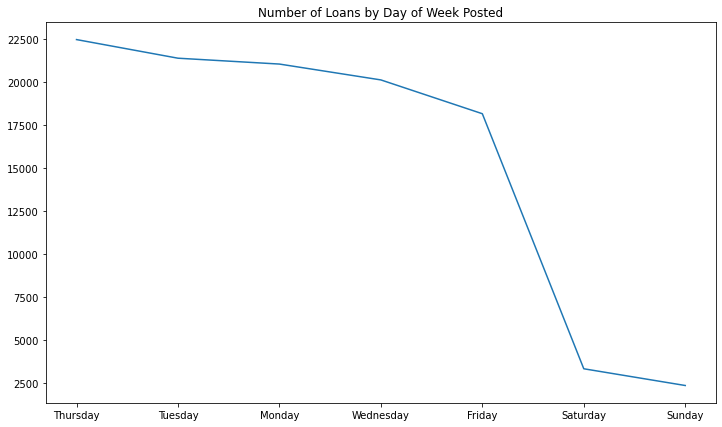

In [677]:
#determine when loans are posted: vast majority of loans are posted during the week
loans_2019.POSTED_TIME.dt.strftime("%A").value_counts().plot(figsize=(12,7))
plt.title('Number of Loans by Day of Week Posted')
plt.show()